# Devoir de Python
Caleb KASHALA ILUNGA

## Table de matiére
    - Partie scrapping
    - Partie nettoyage
    - Partie descriptive
    - partie apprentissage machine learning

### Problématique: Comment estimer le meilleur prix possible en fonction de différentes variables présentées?

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep, time 
from selenium.common.exceptions import StaleElementReferenceException
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.linear_model import SGDClassifier

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn import model_selection as ms

# PARTIE SCRAPPING

In [ ]:
driver = webdriver.Firefox()

In [ ]:

page=driver.get("https://fr.shopping.rakuten.com/nav/Tel-PDA_Telephones-mobiles#xtatc=PUB-[PMC]-[E]-[smartphones-tablettes-objets-connectes]-[sous-categorie]-[smartphone]-[Smartphones]-[]")


In [ ]:
i=1
carac=[]
n=1
pk=[]
page=driver.get("https://fr.shopping.rakuten.com/nav/Tel-PDA_Telephones-mobiles#xtatc=PUB-[PMC]-[E]-[smartphones-tablettes-objets-connectes]-[sous-categorie]-[smartphone]-[Smartphones]-[]")
sleep(5)
driver.find_element_by_link_text("Plus tard").click()
sleep(5)
python_button = driver.find_elements_by_xpath("/html/body/div[2]/div/div/div/div/div[2]/span")[0]
python_button.click()
while n <30:
    pk.append([driver.find_elements_by_class_name("productList_layoutContent_NC_.pl-8.f14")])
    sleep(4)
    driver.find_element_by_link_text("Suivant").click()
    sleep(10)
    p=driver.find_elements_by_class_name("productList_layoutContent_NC_.pl-8.f14")
    sleep(4)
    for i in range(len(p)):
        pa=p[i].find_element_by_class_name("silver.description_caption_3J5")
        
        if len(pa.find_elements_by_class_name("f12.description_bulletPoints_Vnz li"))>1:
            try:
                reseau=([pa.find_elements_by_class_name("f12.description_bulletPoints_Vnz li")[1].text])
            except:
                reseau="NA"
            try:
                ecran=([pa.find_elements_by_class_name("f12.description_bulletPoints_Vnz li")[0].text])
            except:
                ecran="NA"
            try:
                exploit=([pa.find_elements_by_class_name("f12.description_bulletPoints_Vnz li")[2].text])
            except:
                exploit="NA"
            try:
                prix=([p[i].find_element_by_class_name("f20.b").text])
            except:
                prix="NA"
            m=driver.find_elements_by_class_name("lh-title")
            marque=m[i].text
        else:
            pass
        
        Resultat={"Marque":marque,"reseau":reseau,"exploit":exploit,"prix":prix,
                  "écran":ecran}

        carac.append(Resultat)
    
    n=n+1
    

In [ ]:
Data=pd.DataFrame(carac)
Data.to_csv("Data_Scrapping.csv")

* Après avoir lancé le scrapping nous obtenons une base de données avec différentes variables et modalités associées aux variables.
* Notre base de données est une base contenant des informations sur différentes marques et modèles de téléphone, dans cette base de données nous avons 1305 observations et 5 variables:
    - Marque 
    - Réseau 
    - Exploit 
    - prix 
    - Ècran 


In [2]:
#import re
df1=pd.read_csv("Data_Scrapping.csv")#df['Marque'] = df['Header'].str.extract('([A-S]\w{0,})')
df1[1:10]

,Unnamed: 0,Marque,reseau,exploit,prix,écran
1,1,OnePlus Nord N100 Dual SIM 64 Go Midnight Frost,['Réseau 4G'],['Mémoire 64 Go / RAM 4 Go'],"['172,58 €']","['Ecran 6.52""']"
2,2,Huawei P40 lite 128 Go Double SIM Vert crush (...,['Réseau 4G'],['Mémoire 128 Go / RAM 6 Go'],"['196,59 €']","['Ecran 6.4""']"
3,3,Xiaomi Poco X3 NFC Dual-SIM 64 Go Bleu,['Android'],['Double SIM'],"['203,79 €']",['Mémoire 64 Go / RAM 6 Go']
4,4,Xiaomi Mi 10T Dual-SIM 128 Go Noir,['Android'],['Double SIM'],"['409,99 €']",['Mémoire 128 Go / RAM 8 Go']
5,5,Huawei P30 lite 128 Go (RAM 4 Go) Double SIM B...,['Réseau 4G'],['Mémoire 128 Go / RAM 4 Go'],"['214,50 €']","['Ecran 6.15""']"
6,6,Samsung Galaxy Note9 128 Go Double SIM Noir,['Réseau 4G'],['Mémoire 128 Go / RAM 6 Go'],['374 €'],"['Ecran 6.4""']"
7,7,Samsung Galaxy S9 64 Go Double SIM Noir,['Réseau 4G'],['Mémoire 64 Go / RAM 4 Go'],['270 €'],"['Ecran 5.8""']"
8,8,Huawei P20 lite 64 Go Double SIM Noir minuit,['Réseau 4G'],['Mémoire 64 Go / RAM 4 Go'],['189 €'],"['Ecran 5.84""']"
9,9,Samsung Galaxy A51 128 Go Double SIM Blanc,['Réseau 4G'],['Mémoire 128 Go / RAM 4 Go'],"['289,99 €']","['Ecran 6.5""']"


# Partie Nettoyage

#### Après avoir créé notre base de données provenant du scrapping nous allons commencer par nettoyer notre base de données et apporter quelques modifications.

Dans un premier temps nous commençons par transformer toutes nos variables en type "str" pour pouvoir facilement utiliser les fonctions extract etreplace.  

In [3]:
#str
df1['écran']=df1['écran'].astype(str)
df1['reseau']=df1['reseau'].astype(str)
df1['Marque']=df1['Marque'].astype(str)
df1['exploit']=df1['exploit'].astype(str)
df1['prix']=df1['prix'].astype(str)

In [4]:
#str
#df['sexe'].astype('int')
df1.dropna ( axis = 0 ,  how = 'all' )

,Unnamed: 0,Marque,reseau,exploit,prix,écran
0,0,Samsung Galaxy Note10 256 Go Double SIM Noir,['Réseau 4G'],['Mémoire 256 Go / RAM 8 Go'],"['546,88 €']","['Ecran 6.3""']"
1,1,OnePlus Nord N100 Dual SIM 64 Go Midnight Frost,['Réseau 4G'],['Mémoire 64 Go / RAM 4 Go'],"['172,58 €']","['Ecran 6.52""']"
2,2,Huawei P40 lite 128 Go Double SIM Vert crush (...,['Réseau 4G'],['Mémoire 128 Go / RAM 6 Go'],"['196,59 €']","['Ecran 6.4""']"
3,3,Xiaomi Poco X3 NFC Dual-SIM 64 Go Bleu,['Android'],['Double SIM'],"['203,79 €']",['Mémoire 64 Go / RAM 6 Go']
4,4,Xiaomi Mi 10T Dual-SIM 128 Go Noir,['Android'],['Double SIM'],"['409,99 €']",['Mémoire 128 Go / RAM 8 Go']
...,...,...,...,...,...,...
1300,1300,Apple iPhone 6 Plus 16 Go Or,['Réseau 4G'],['iOS 8'],"['164,90 €']","['Ecran 5.5""']"
1301,1301,Samsung Galaxy A5 (2017) Dual SIM 32 Go Or sable,['Android 6.0 (Marshmallow)'],['Double SIM'],"['159,98 €']","['Ecran 5.2""']"
1302,1302,Samsung Galaxy Xcover 4 16 Go Noir,['Réseau 4G'],['Mémoire 16 Go / RAM 2 Go'],"['159,99 €']","['Ecran 5""']"
1303,1303,Samsung Galaxy A5 (2017) 32 Go Or,['Réseau 4G'],['Mémoire 32 Go / RAM 3 Go'],"['149,99 €']","['Ecran 5.2""']"


In [5]:
import Nettoyage

Dans un premier temps nous commençons par nettoyer la variable marque, pour si faire nous avons fait en sorte de ne garder que les marquent des téléphones et non pas les modèles associés aux marques.\
Ensuite nous avons mis toutes les variables en minuscule, pour facilement pouvoir séparer les données par marques.

In [6]:
Nettoyage.nettoyage_marque(df1)

C:\Users\caleb\Desktop\Devoir python\Nettoyage.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichier['Marque'][i]="Inconnu"


In [7]:
df1.Marque.value_counts()

samsung       389
apple         275
xiaomi        138
inconnu       135
huawei        111
oneplus        43
nokia          41
sony           38
google         26
honor          21
asus           17
oppo           16
realme         16
lg             13
blackberry     10
nubia           9
alcatel         3
oukitel         2
cubot           2
Name: Marque, dtype: int64

Dans la cellule suivante nous avons nettoyé les données provenant de la variable écran. Nous avons enlevé la chaine de caractère "['Écran " au début et nous avons enlevé les 3 dernières chaine de caractère

In [8]:
Nettoyage.nettoyage_ecran(df1)

In [9]:
del df1['Unnamed: 0']

In [10]:
#str
df1['écran']=df1['écran'].astype(str)
df1['reseau']=df1['reseau'].astype(str)
df1['Marque']=df1['Marque'].astype(str)
df1['exploit']=df1['exploit'].astype(str)
df1['prix']=df1['prix'].astype(str)

Pour le nettoyage de du variable réseau nous avons transformé les modalités:
    - 5G si le téléphone est doté d'un réseau 5G
    - 4G si le téléphone est doté d'un réseau 4G
    - 3G si le téléphone est doté d'un réseau 3G
    

In [11]:
Nettoyage.nettoyage_reseau(df1)

En ce qui concerne le nettoyage des données provenant de la variable prix nous avons remplacé les virgules par des points pour pouvoir ensuite les transformer en type numérique, ensuite nous avons enlevé le signe euro et le "nan" présent dans cette colonne.

In [12]:
Nettoyage.nettoyage_prix(df1)

En ce qui concerne le nettoyage des données provenant de la variable exploit nous avons effacé les chaines de caractère "['" et "']" présent.

In [13]:
Nettoyage.nettoyage_exploit(df1)

À partir de le variable exploit nous avons créé deux variables la variable RAM et la variable mémoire. Dans le cas où l'information sur le RAM et la mémoire serait inexistante dans le variable exploit nous avons défini la modalité "inconnu". Et nous avons pour la fin supprimée la colonne associée à la variable exploit.


In [14]:
Nettoyage.col_Ram(df1)

In [15]:
Nettoyage.cor_exploit(df1)

In [16]:
Nettoyage.col_memoire(df1)

In [17]:
df1.pop('exploit')
df1[1:10]

,Marque,reseau,prix,écran,Ram,Mémoire
1,oneplus,4G,172.58,6.52,RAM 4 Go,64
2,huawei,4G,196.59,6.4,RAM 6 Go,128
5,huawei,4G,214.50,6.15,RAM 4 Go,128
6,samsung,4G,374,6.4,RAM 6 Go,128
7,samsung,4G,270,5.8,RAM 4 Go,64
8,huawei,4G,189,5.84,RAM 4 Go,64
9,samsung,4G,289.99,6.5,RAM 4 Go,128
10,inconnu,5G,320.88,6.6,RAM 4 Go,128
11,google,5G,825,6,RAM 8 Go,128


In [18]:
print(df1['Ram'].value_counts())

Inconnu        330
 RAM 4 Go      181
 RAM 6 Go      157
 RAM 8 Go      124
 RAM 3 Go       84
 RAM 2 Go       61
 RAM 1 Go       18
 RAM 12 Go       9
 RAM 512 Mo      7
 Inconnu         3
 RAM 16 Go       3
Name: Ram, dtype: int64


In [19]:
Nettoyage.nettoyage_prix(df1)

In [20]:
print(df1.Marque.value_counts())

samsung       267
apple         258
xiaomi        114
huawei         93
inconnu        64
sony           29
oneplus        29
nokia          26
google         21
honor          21
asus           15
oppo           14
lg              9
blackberry      8
realme          8
alcatel         1
Name: Marque, dtype: int64


In [21]:
df1=df1.reset_index()
del df1['index']

* Àprès avoir nettoyé toute notre base de données et ajouté deux variables  nous nous retrouvons avec une base de données de 977 observations et 6 variables.  

In [22]:
df1[1:10]

,Marque,reseau,prix,écran,Ram,Mémoire
1,oneplus,4G,172.58,6.52,RAM 4 Go,64
2,huawei,4G,196.59,6.4,RAM 6 Go,128
3,huawei,4G,214.50,6.15,RAM 4 Go,128
4,samsung,4G,374,6.4,RAM 6 Go,128
5,samsung,4G,270,5.8,RAM 4 Go,64
6,huawei,4G,189,5.84,RAM 4 Go,64
7,samsung,4G,289.99,6.5,RAM 4 Go,128
8,inconnu,5G,320.88,6.6,RAM 4 Go,128
9,google,5G,825,6,RAM 8 Go,128


# PARTIE DESCRIPTIVE

Pour commencer cette partie nous transformons toutes nos variables en type "category" sauf la variable correspondant au prix.

In [23]:
#str
df1.Ram=df1.Ram.astype("category")
df1.reseau=df1.reseau.astype("category")
df1.Marque=df1.Marque.astype("category")
df1['écran']=df1['écran'].astype("category")
df1['Mémoire']=df1['Mémoire'].astype("category")
df1.prix=pd.to_numeric(df1["prix"])

In [24]:
complet=df1

Avec cette commande nous montrons le nombre de modalités par variable, modalité la plus représentée pour chaque variable et leur nombre d'apparition.

In [25]:
price = complet.set_index('prix') # transformer la variable en
print(price.describe())

         Marque reseau écran      Ram  Mémoire
count       977    977   977      977      977
unique       16      3    72       11        9
top     samsung     4G   6.1  Inconnu  Inconnu
freq        267    784    83      330      333


Ici nous montrons quelques informations sur le variable prix, notamment la moyenne, le minimum et le maximum.

In [26]:
df1.describe().round(2)

,prix
count,977.00
mean,370.50
std,321.79
min,15.00
25%,159.40
50%,255.00
75%,469.99
max,2099.00


In [27]:
import seaborn as sns
import numpy
import pandas


DeprecationWarning

Nous remarquons grace à ces deux graphiques que la majorité des téléphones ont un prix compris entre 15 et 500 euros.

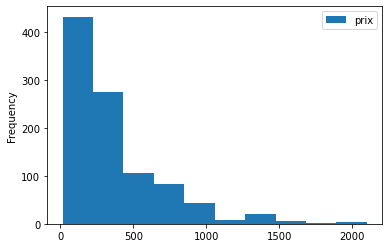

In [28]:
df1.plot.hist()

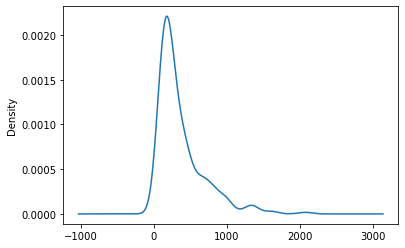

In [29]:
df1.prix.plot(kind = "kde")

Grâce à ce boxplot nous constatons que le prix du téléphone dépend assez grandement de sa technologie réseau.\
Plus la technologie réseau est élevée plus le prix en moyenne est élevé.

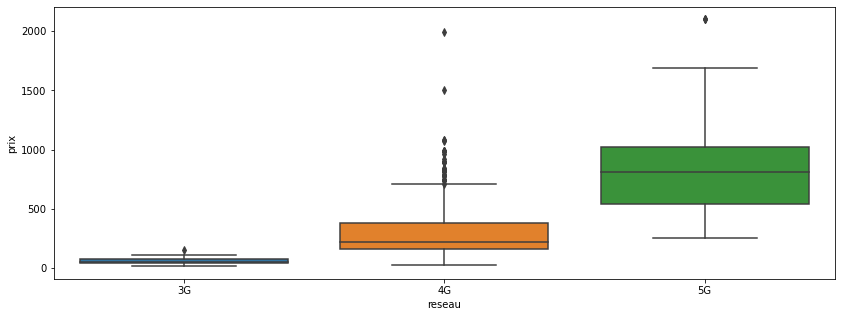

In [30]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="reseau", y="prix", data=df1)

Grâce à ce diagramme en bâton nous observons que les téléphones de marque Samsung et apple sont les plus représentés ensuite viennent les marques telles que xiaomi, huawei et la variable "inconnu".

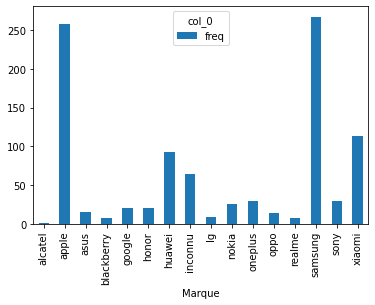

In [31]:
t = pandas.crosstab(df1.Marque, "freq")
t.plot.bar()

Dans ce graphique nous représentons des boxplot qui nous montrent les prix par marques. 

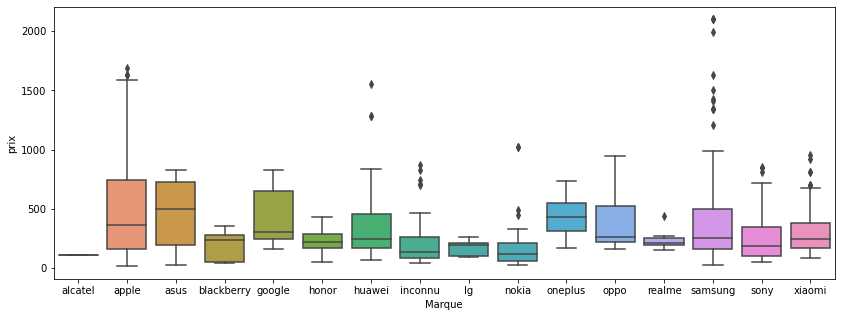

In [32]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="Marque", y="prix", data=df1)

Ici nous représentons un camembert qui repreneuse l'effectif des téléphones pour chaque RAM disponiple.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F5B1B2580>],
      dtype=object)

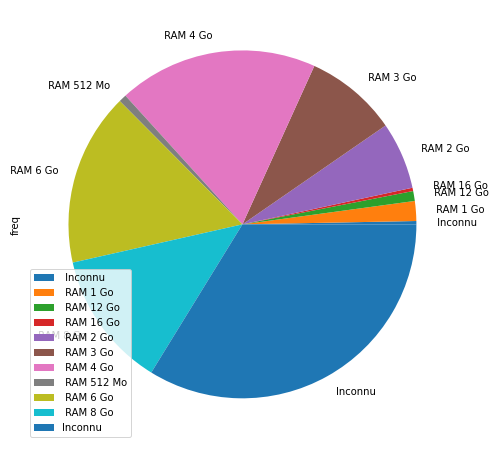

In [33]:
t = pandas.crosstab(df1.Ram, "freq")
t.plot.pie(subplots=True, figsize = (8,8))

Ce graphique nous montre la quantité de téléphone en fonction de sa technologie réseau et de sa mémoire. 

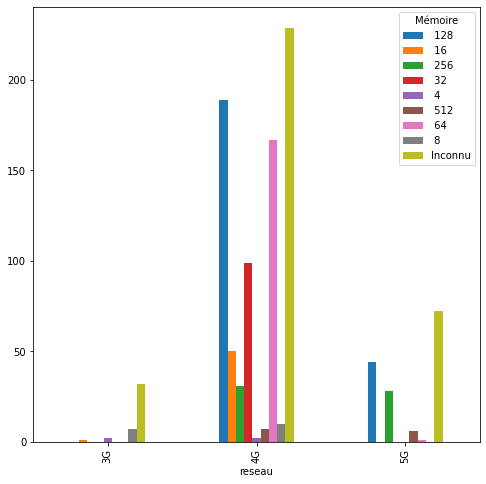

In [34]:
t = pd.crosstab(df1.reseau, df1.Mémoire)
t.plot.bar( figsize = (8,8))


# Partie Apprentissage

Pour commencer la partie apprentissage nous commençons par définir les variables explicatives et la variable à expliquer.\
En ce qui nous concerne la variable à expliquer est le prix en fonction des variables marques, réseau, RAM, écran, mémoire.

In [35]:
X, y = df1[["Marque","reseau","Ram","écran","Mémoire"]], df1["prix"]

Nous vérifions que nous avons bien le même nombre de lignes dans les matrices associé aux variables explicatives et à la variable à expliquer.

In [36]:
X.shape, y.shape

((977, 5), (977,))

In [37]:
from sklearn.model_selection import train_test_split

* Séparation de la base de données en données d'entrainement et données d'apprentissage

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
quali = ["Marque","reseau","Ram","écran","Mémoire"] 

qualitrans=Pipeline(steps=[('imputer',OneHotEncoder(handle_unknown="ignore"))])

transformer = ColumnTransformer(transformers=[('cat',qualitrans,quali)])

*  Grâce à cette fonction nous allons pouvoir modéliser  plusieurs modèles avec différents paramètres.
* Les modèles qui sont modélisés sont les suivants:*LinearRegression, Lasso, Ridge, ElasticNet, KNeighborsRegressor, SVR, RandomForestRegressor, MLPRegressor*.

In [40]:

modeles = []
modeles.append(LinearRegression())

for val_alpha in (1e-3, 1e-2, 1e-1, 1):
    modeles.append(Lasso(alpha=val_alpha))
    
for val_alpha in (1e-3, 1e-2, 1e-1, 1):
    modeles.append(Ridge(alpha=val_alpha))

for val_alpha in (1e-3, 1e-2, 1e-1, 1):
    for val_l1 in (0.25, 0.5, 0.75):
        modeles.append(ElasticNet(alpha=val_alpha, l1_ratio=val_l1))
    
for nb_voisins in range(3, 10):
    modeles.append(KNeighborsRegressor(n_neighbors=nb_voisins))



for val_epsilon in (10 ** n for n in range(-3, 1)):
    for val_C in (10 ** n for n in range(-3, 4)):
        modeles.append(SVR(epsilon=val_epsilon, C=val_C))


for nb_estimateurs in (50, 100, 150, 200):
    modeles.append(RandomForestRegressor(n_estimators=nb_estimateurs))
    
for nb_neurones in  ((100,), (50, 50), (25, 50, 25)):
    modeles.append(MLPRegressor(hidden_layer_sizes=nb_neurones))
    
i=0
Classificateur=[]
for i in range(len(modeles)):
    liste= Pipeline(steps=[("processor",transformer),
                        ("classi",modeles[i])])
    Classificateur.append(liste) 
    i=i+1
    
i=0
resultats=[]
for i in range(len(Classificateur)):
    cr=cross_val_score(Classificateur[i],X_train,y_train,cv=10)
    resultats.append(cr)
    i=i+1
DeprecationWarning

C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1858602.4993796684, tolerance: 6767.307471662021
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1948954.9703600053, tolerance: 6772.872292048161
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1509948.71864085, tolerance: 7108.9050141169355
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234424.1334314607, tolerance: 7080.577867678696
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499822.73349139653, tolerance: 7256.084707702792
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3996819.9923812756, tolerance: 6767.307471662021
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

* Performance des modèles sur les données d'entrainement suite à une cross-validation.

In [41]:
Dico={}
i=0
for i in range(len(resultats)):
    Dico[modeles[i]]=[resultats[i].mean(),resultats[i].std()]
    i=i+1

In [42]:
for key, value in (sorted(Dico.items(), key=lambda x: x[1],reverse=True)) :
    print(f'{repr(key):50} : {value}')

RandomForestRegressor(n_estimators=200)            : [0.8500670896710559, 0.0452415438631804]
RandomForestRegressor(n_estimators=50)             : [0.8459837252851836, 0.0425471041385668]
RandomForestRegressor(n_estimators=150)            : [0.8447658919372051, 0.04981255906222098]
RandomForestRegressor()                            : [0.8445608626103738, 0.04700879066574336]
SVR(C=1000, epsilon=1)                             : [0.8098230198250691, 0.07335370999561991]
SVR(C=1000)                                        : [0.8095997135884161, 0.07344033867810665]
SVR(C=1000, epsilon=0.01)                          : [0.8095796211923375, 0.07345039282427256]
SVR(C=1000, epsilon=0.001)                         : [0.8095776309920767, 0.07345137517969176]
MLPRegressor(hidden_layer_sizes=(25, 50, 25))      : [0.7880671546626665, 0.06643525081167745]
KNeighborsRegressor(n_neighbors=4)                 : [0.7842880696893514, 0.05980865008094562]
ElasticNet(alpha=0.001, l1_ratio=0.75)             :

In [43]:
modfit=[]
for i in range(len(Classificateur)):
    L = Classificateur[i].fit(X_train, y_train)
    modfit.append(L)

C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163020.204727728, tolerance: 7907.571891470534
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84049.36738547683, tolerance: 7907.571891470534
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210658.7577155307, tolerance: 7907.571891470534
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

* Performance des modèles sur les données de test suite à une cross-validation.

In [44]:
Dicoscoretest={}
i=0
for i in range(len(modeles)):
    Dicoscoretest[modeles[i]]=[modfit[i].score(X_test, y_test)]
    i=i+1


In [45]:
for key, value in (sorted(Dicoscoretest.items(), key=lambda x: x[1],reverse=True)) :
    print(f'{repr(key):50} : {value}')

RandomForestRegressor(n_estimators=200)            : [0.8241934501947241]
RandomForestRegressor(n_estimators=50)             : [0.8230916624617003]
RandomForestRegressor(n_estimators=150)            : [0.8226891585261457]
RandomForestRegressor()                            : [0.8225567096535018]
MLPRegressor(hidden_layer_sizes=(25, 50, 25))      : [0.8199349473220139]
SVR(C=1000, epsilon=1)                             : [0.8061313813667815]
SVR(C=1000)                                        : [0.8060535127113734]
SVR(C=1000, epsilon=0.01)                          : [0.8060404785478497]
SVR(C=1000, epsilon=0.001)                         : [0.8060391439345816]
KNeighborsRegressor(n_neighbors=9)                 : [0.7997880650492766]
KNeighborsRegressor(n_neighbors=8)                 : [0.7977441366148311]
KNeighborsRegressor(n_neighbors=6)                 : [0.7890954586828117]
KNeighborsRegressor(n_neighbors=7)                 : [0.7835892341103244]
KNeighborsRegressor()                 

* Àprès avoir testé et ordonné tous les modèles sur les données d'entrainement et les données de test du meilleur au plus mauvais, nous constatons que les modèles sont les Random Forest. Et plus précisement celle avec un n_estimators de défaut c'est à 200(dans mon cas). 


In [46]:
import machine

* Nous utilisons le modfit[57] car elle correspond au modèle random forest avec un n_estimators par défaut.

In [47]:
machine.prediction(df1,modfit[57],1)

,predicted,true,difference
1,188.416029,172.58,15.836029


La fonction prediction provenant de machine.py fait une estimation du prix par rapports aux différentes variables explicatives.Elle estime le meilleur prix possible en fonction des données.

Ici les données proviennent de la base de données déjà existante que nous avons mais nous aurions bien évidemment pu modifier la fonction pour que nous-mêmes entrons les valeurs des variables explicatives et non pas qu'elles proviennent de la base de données déjà existante ou fictive.Et faire bien plus encore

Nous avons laissé certaine fonction comme celle du scrraping et celle sur les modèles(cross-validation) pour montrer la complexité.

# fin